In [ ]:
!pip install tensorflow

In [ ]:
pip install --upgrade tensorflow

In [ ]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import keras
import os
import requests
import zipfile
import random
import seaborn as sns
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array
import PIL.Image
from io import BytesIO
import cv2
import matplotlib.image as mpimg
import seaborn as sns
from tqdm import tqdm
from keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.metrics import confusion_matrix , accuracy_score
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import glob
import pandas as pan
import matplotlib.pyplot as plotter
import warnings
warnings.filterwarnings('ignore')
from IPython.display import Image
from tensorflow.keras.applications import VGG19
from tensorflow.keras import models, layers
from tensorflow.keras.models import load_model
import shutil
from keras.callbacks import EarlyStopping

In [ ]:

# Path to the zip file
fungi_path = "/content/drive/MyDrive/DS4002/defungi.zip"

# Directory where contents are extracted
fungi_output = "/content/drive/MyDrive/DS4002/Unedited"

# Step 1: Extract the contents of the archive.zip file
with zipfile.ZipFile(fungi_path, 'r') as zip_ref:
    zip_ref.extractall(fungi_output)

# Specify the correct path to the image data directory
image_data = fungi_output

pd.DataFrame(os.listdir(image_data),columns=['Files_Name'])

files = [i.replace("\\", "/") for i in glob.glob(image_data + "//*//*")]
np.random.shuffle(files)
labels = [os.path.dirname(i).split("/")[-1] for i in files]
data = zip(files, labels)
dataframe = pd.DataFrame(data, columns=["Image", "Label"])

dataframe

,Image,Label
0,/content/drive/MyDrive/DS4002/Unedited/H2/H2_4...,H2
1,/content/drive/MyDrive/DS4002/Unedited/H3/H3_6...,H3
2,/content/drive/MyDrive/DS4002/Unedited/H1/H1_1...,H1
3,/content/drive/MyDrive/DS4002/Unedited/H2/H2_4...,H2
4,/content/drive/MyDrive/DS4002/Unedited/H1/H1_6...,H1
...,...,...
9109,/content/drive/MyDrive/DS4002/Unedited/H5/H5_2...,H5
9110,/content/drive/MyDrive/DS4002/Unedited/H1/H1_8...,H1
9111,/content/drive/MyDrive/DS4002/Unedited/H1/H1_8...,H1
9112,/content/drive/MyDrive/DS4002/Unedited/H1/H1_8...,H1


In [ ]:
# Listing the 5 subdirectories in the extracted folder
classes = [os.path.join(fungi_output, o) for o in os.listdir(fungi_output)
           if os.path.isdir(os.path.join(fungi_output,o))]

# Initialize a DataFrame to store image data
image_dimensions = pd.DataFrame()

# Loop through each class folder to extract image paths and labels
for class_path in classes:
    class_name = os.path.basename(class_path)
    images = [os.path.join(class_path, f) for f in os.listdir(class_path) if os.path.isfile(os.path.join(class_path, f))]
    data = pd.DataFrame({'path': images, 'label': class_name})
    image_dimensions = pd.concat([image_dimensions, data], ignore_index=True)

# Display the last few rows of the data frame
print(image_dimensions.tail())

                                                   path label
9109  /content/drive/MyDrive/DS4002/Unedited/H6/H6_9...    H6
9110  /content/drive/MyDrive/DS4002/Unedited/H6/H6_9...    H6
9111  /content/drive/MyDrive/DS4002/Unedited/H6/H6_9...    H6
9112  /content/drive/MyDrive/DS4002/Unedited/H6/H6_9...    H6
9113  /content/drive/MyDrive/DS4002/Unedited/H6/H6_9...    H6


# Exploratory Data Analysis

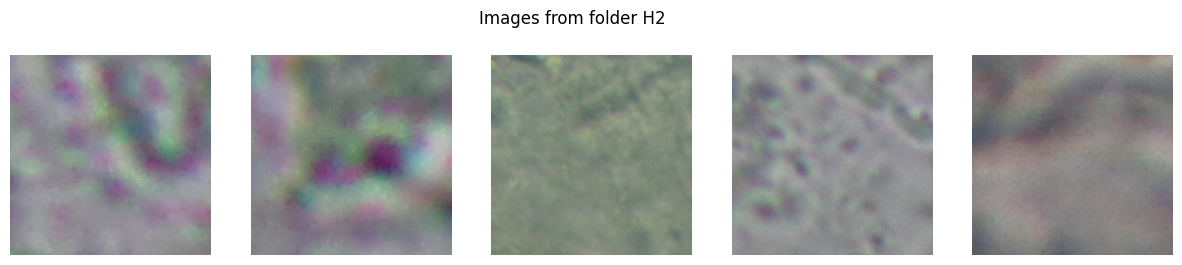

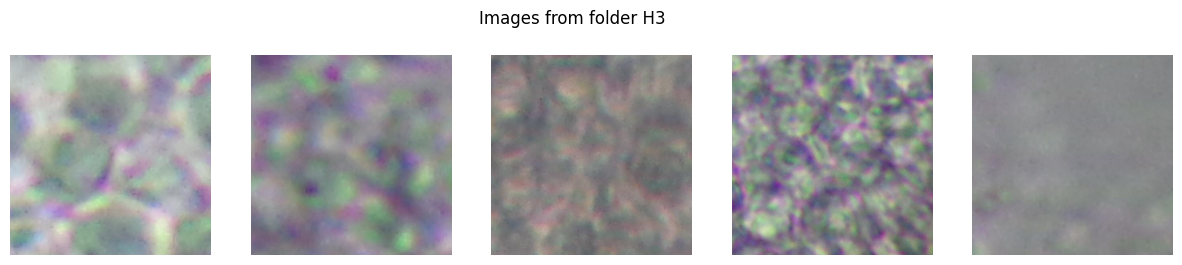

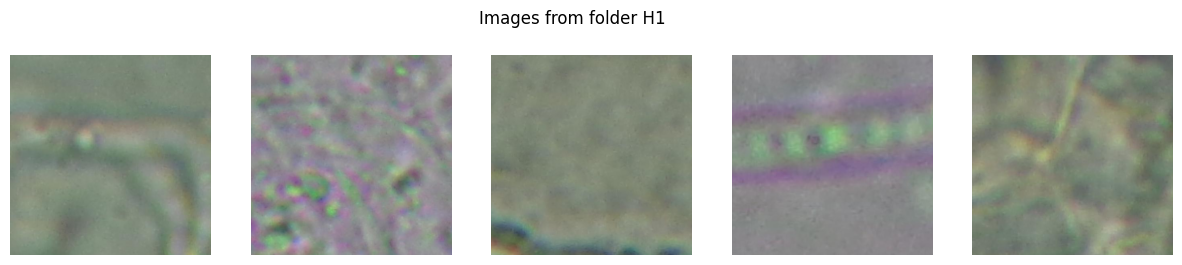

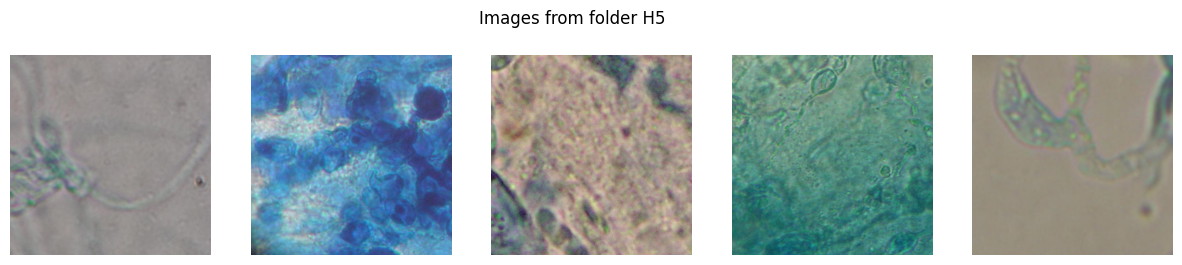

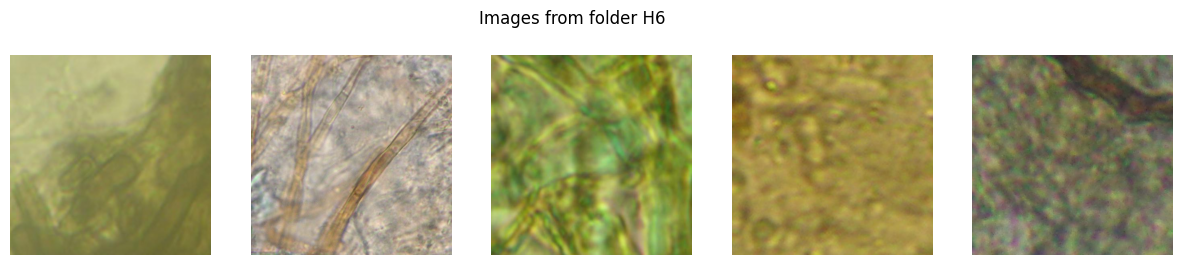

In [ ]:
# Visualize 5 images from each folder
folders = dataframe['Label'].unique()

for folder in folders:
    folder_images = dataframe[dataframe['Label'] == folder]['Image'][:5]

    fig, axs = plt.subplots(1, 5, figsize=(15, 3))  # Adjust figsize as needed

    for i, image_path in enumerate(folder_images):
        img = mpimg.imread(image_path)
        axs[i].imshow(img)
        axs[i].axis('off')

    plt.suptitle(f"Images from folder {folder}")
    plt.show()

## Visualization- Bar Chart to check class balance

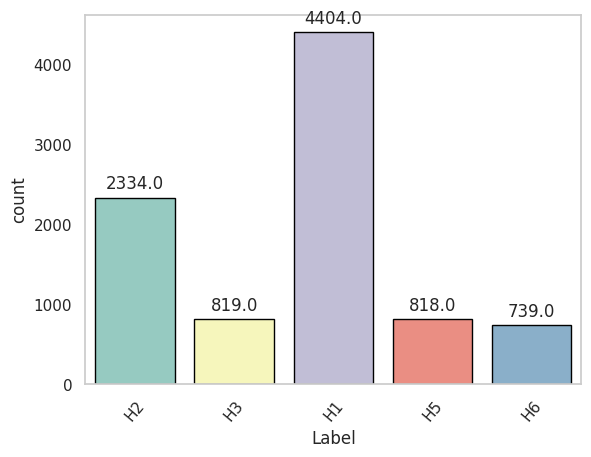

In [ ]:
# Create style for plot
sns.set(style="whitegrid")

# Create a countplot with different colors for each category
ax = sns.countplot(x=dataframe["Label"], palette="Set3", edgecolor='black')

# Annotate each bar with its count
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.xticks(rotation=50)
plt.grid(False)  # Turn off grid lines
plt.show()

# Data Augmentation- Image Enhancing

In [1]:
# # Create a directory to save augmented images
# augmented_dir = "/content/drive/MyDrive/DS4002/AugmentedImages"
# os.makedirs(augmented_dir, exist_ok=True)

# # Data augmentation settings
# datagen = ImageDataGenerator(
#     rotation_range=40,
#     width_shift_range=0.2,
#     height_shift_range=0.2,
#     shear_range=0.2,
#     zoom_range=0.2,
#     horizontal_flip=True,
#     fill_mode='nearest'
# )

# # Apply data augmentation to each image and save the augmented images
# for index, row in dataframe.iterrows():
#     print(row['Image'])
#     img = load_img(row['Image'])
#     x = img_to_array(img)
#     x = x.reshape((1,) + x.shape)

#     # Generate augmented images
#     i = 0
#     for batch in datagen.flow(x, batch_size=1, save_to_dir=augmented_dir, save_prefix=row['Label'], save_format='jpeg'):
#         i += 1
#         if i >= 2:  # Generate 5 augmented images for each original image
#             break

# # Assuming augmented_dir is the directory where augmented images are saved
# augmented_dir = "/content/drive/MyDrive/DS4002/AugmentedImages"

# # Create an empty DataFrame to store information about augmented images
# augmented_dataframe = pd.DataFrame(columns=['Image', 'Label'])

# # Iterate through the augmented images directory
# for filename in os.listdir(augmented_dir):
#     # Assuming the file names are in the format "label_image_index.jpeg"
#     label = filename.split('_')[0]

#     # Create the file path
#     filepath = os.path.join(augmented_dir, filename)

#     #Append the information to the DataFrame
#     augmented_dataframe = augmented_dataframe.append({'Image': filepath, 'Label': label}, ignore_index=True)

# # Display the first few rows of the augmented DataFrame
# # print(augmented_dataframe)
# # print(augmented_dataframe.shape)

## Reclassifying and Viewing Enhanced Images

In [ ]:
def sort_images(base_dir):
    # Define the target folders based on prefixes
    target_folders = ['H1', 'H2', 'H3', 'H5', 'H6']

    # Create target folders if they don't exist
    for folder in target_folders:
        os.makedirs(os.path.join(base_dir, folder), exist_ok=True)

    # Dictionary to track filenames to avoid duplicates
    seen_filenames = {}

    # Iterate over files in the base directory
    for filename in os.listdir(base_dir):
        filepath = os.path.join(base_dir, filename)

        # Skip if it's a directory
        if os.path.isdir(filepath):
            continue

        # Check if the file starts with one of the prefixes
        for prefix in target_folders:
            if filename.startswith(prefix):
                target_path = os.path.join(base_dir, prefix, filename)

                # Check for duplicates
                if filename not in seen_filenames:
                    # Move file to the corresponding folder
                    shutil.move(filepath, target_path)
                    seen_filenames[filename] = True
                else:
                    # Remove duplicate file
                    os.remove(filepath)

# Usage
base_dir = "/content/drive/MyDrive/DS4002/AugmentedImages"
sort_images(base_dir)

In [ ]:
enhanced_path = "/content/drive/MyDrive/DS4002/AugmentedImages"
enhanced_images = enhanced_path

files_new = [i.replace("\\", "/") for i in glob.glob(enhanced_images + "//*//*")]
np.random.shuffle(files_new)
labels1 = [os.path.dirname(i).split("/")[-1] for i in files]
data_new = zip(files_new, labels1)
enhanced_df = pd.DataFrame(data_new, columns=["Image", "Label"])

# Visualize 5 images from each folder
folders = enhanced_df['Label'].unique()

for folder in folders:
    folder_images = enhanced_df[enhanced_df['Label'] == folder]['Image'][:5]

    fig, axs = plt.subplots(1, 5, figsize=(15, 3))  # Adjust figsize as needed

    for i, image_path in enumerate(folder_images):
        img = mpimg.imread(image_path)
        axs[i].imshow(img)
        axs[i].axis('off')

    plt.suptitle(f"Images from folder {folder}")
    plt.show()

Output hidden; open in https://colab.research.google.com to view.

## Bar Chart Visualization

  label  count  proportion
0    H1   5911    0.421462
1    H2   3746    0.267094
2    H3   1495    0.106595
3    H5   1494    0.106524
4    H6   1379    0.098324


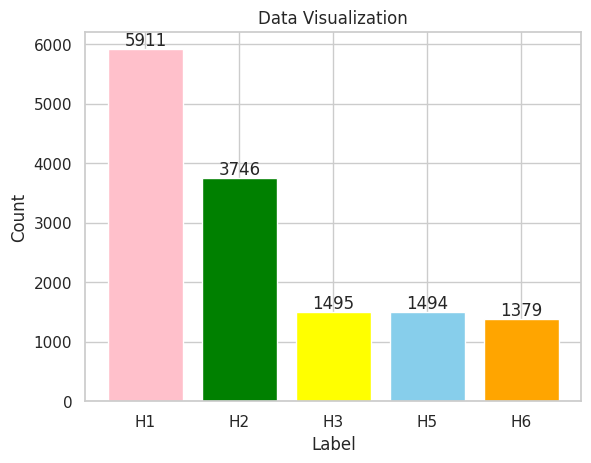

In [ ]:
#preliminary EDA
grouped = enhanced_dimensions.groupby('label').size().reset_index(name='count')
grouped['proportion'] = grouped['count'] / grouped['count'].sum()

print(grouped)

#making a graph for EDA
colors = ['pink', 'green', 'yellow', 'skyblue', 'orange']
graph = plt.bar(grouped['label'], grouped['count'], color = colors)
plt.xlabel("Label")
plt.ylabel("Count")
plt.title("Data Visualization")

for bar in graph:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), va='bottom', ha='center')


plt.show()

In [ ]:
enhanced_images = enhanced_path

# Listing the 5 subdirectories in the extracted folder
classes = [os.path.join(enhanced_images, o) for o in os.listdir(enhanced_images)
           if os.path.isdir(os.path.join(enhanced_images,o))]

# Initialize a DataFrame to store image data
enhanced_dimensions = pd.DataFrame()

# Loop through each class folder to extract image paths and labels
for class_path in classes:
    class_name = os.path.basename(class_path)
    images = [os.path.join(class_path, f) for f in os.listdir(class_path) if os.path.isfile(os.path.join(class_path, f))]
    data = pd.DataFrame({'path': images, 'label': class_name})
    enhanced_dimensions = pd.concat([enhanced_dimensions, data], ignore_index=True)

# Display the last few rows of the data frame
print(enhanced_dimensions.tail())

                                                    path label
14020  /content/drive/MyDrive/DS4002/AugmentedImages/...    H6
14021  /content/drive/MyDrive/DS4002/AugmentedImages/...    H6
14022  /content/drive/MyDrive/DS4002/AugmentedImages/...    H6
14023  /content/drive/MyDrive/DS4002/AugmentedImages/...    H6
14024  /content/drive/MyDrive/DS4002/AugmentedImages/...    H6


## Data Processing: Balancing Class Weights

In [ ]:
#Balancing the dataset by removing half of the images from the class with the most images
max_class = grouped[grouped['count'] == grouped['count'].max()]['label'].values[0]
max_class_paths = enhanced_dimensions[enhanced_dimensions['label'] == max_class]['path'].tolist()

# Shuffle the paths randomly
random.shuffle(max_class_paths)

# Determine the number of paths to keep
num_to_keep = len(max_class_paths) // 2

# Select the first num_to_keep paths after shuffling
selected_paths = max_class_paths[:num_to_keep]

# Filter out the selected paths from the dataset
enhanced_dimensions = enhanced_dimensions[~enhanced_dimensions['path'].isin(selected_paths)]

# Recheck the distribution after balancing
grouped = enhanced_dimensions.groupby('label').size().reset_index(name='count')
grouped['proportion'] = grouped['count'] / grouped['count'].sum()
print(grouped)



  label  count  proportion
0    H1   2956    0.321409
1    H2   1873    0.203653
2    H3   1495    0.162553
3    H5   1494    0.162444
4    H6   1379    0.149940


# Model I: Convolutional Neural Network from scratch

Found 7357 validated image filenames belonging to 5 classes.
Found 1840 validated image filenames belonging to 5 classes.
Epoch 1/10
230/230 [==============================] - 100s 427ms/step - loss: 1.4649 - accuracy: 0.5373 - val_loss: 0.9608 - val_accuracy: 0.6082
Epoch 2/10
230/230 [==============================] - 96s 417ms/step - loss: 0.9258 - accuracy: 0.6368 - val_loss: 1.0180 - val_accuracy: 0.6152
Epoch 3/10
230/230 [==============================] - 95s 413ms/step - loss: 0.7941 - accuracy: 0.6852 - val_loss: 0.9155 - val_accuracy: 0.6397
Epoch 4/10
230/230 [==============================] - 99s 428ms/step - loss: 0.6407 - accuracy: 0.7506 - val_loss: 1.0394 - val_accuracy: 0.6114
Epoch 5/10
230/230 [==============================] - 99s 430ms/step - loss: 0.4487 - accuracy: 0.8369 - val_loss: 1.0846 - val_accuracy: 0.6147
Epoch 5: early stopping


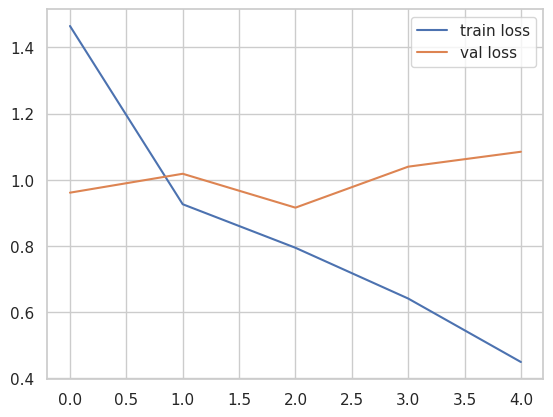

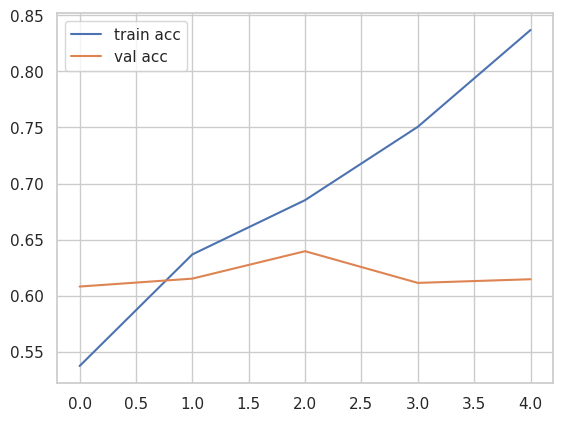

<Figure size 640x480 with 0 Axes>

In [ ]:
#initializing CNN and adding a convolutional layer
model=Sequential()
model.add(Conv2D(filters=16,kernel_size=2,padding="same",activation="relu",input_shape=(500,500,3))) #3 is for RGB


#doing a Pooling operation to downsample our image
model.add(MaxPooling2D(pool_size=2)) #we are choosing to do MaxPooling. This also helps our model pick up on variation!


#adding 2 more convolutional layers
model.add(Conv2D(filters=32,kernel_size=2,padding="same",activation ="relu"))
model.add(MaxPooling2D(pool_size=2)) #notice how we are pooling everytime
model.add(Conv2D(filters=64,kernel_size=2,padding="same",activation="relu"))
model.add(MaxPooling2D(pool_size=2)) #with filter numbers 32 and 64

#flattening operation
model.add(Flatten())

#now we are taking our flattened info and will then use it to build the artificial neural network
model.add(Dense(500,activation="relu"))
model.add(Dense(5,activation="softmax")) #using Keras to do this. softmax is used to take our outputs of neural network and build probabilities of each possible outcome in our classes

##now our basic model is done. let us compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

X = enhanced_dimensions['path']
y = enhanced_dimensions['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)  # 20% data as test set

from tensorflow.keras.preprocessing.image import ImageDataGenerator

# creating our train and test data
datagen = ImageDataGenerator(rescale=1./255)
train_df = pd.DataFrame({'path': X_train, 'label': y_train})
test_df = pd.DataFrame({'path': X_test, 'label': y_test})

train_generator = datagen.flow_from_dataframe(
    dataframe=train_df,
    x_col='path',
    y_col='label',
    target_size=(500, 500),  # Adjust as needed
    batch_size=32,          # Adjust as needed
    class_mode='categorical')

test_generator = datagen.flow_from_dataframe(
    dataframe=test_df,
    x_col='path',
    y_col='label',
    target_size=(500, 500),  # Adjust as needed
    batch_size=32,          # Adjust as needed
    class_mode='categorical')


early_stop = EarlyStopping(monitor='val_loss', patience=2, verbose=1)

r = model.fit(
    train_generator,
    validation_data=test_generator,
    epochs=10,
    steps_per_epoch=len(train_generator),
    validation_steps=len(test_generator), callbacks=[early_stop]
)


plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

# Model II: VGG19 Model

## Data Partitioning

In [ ]:
train_data_dir = enhanced_path
batch_size = 32
target_size = (224,224)
validation_split = 0.2
train= tf.keras.preprocessing.image_dataset_from_directory(
    train_data_dir,
    validation_split=validation_split,
    subset="training",
    seed=100,
    image_size=target_size,
    batch_size=batch_size,
)
validation= tf.keras.preprocessing.image_dataset_from_directory(
    train_data_dir,
    validation_split=validation_split,
    subset="validation",
    seed=200,
    image_size=target_size,
    batch_size=batch_size,
)

Found 14025 files belonging to 5 classes.
Using 11220 files for training.
Found 14025 files belonging to 5 classes.
Using 2805 files for validation.


In [ ]:
class_names = train.class_names
class_names

['H1', 'H2', 'H3', 'H5', 'H6']

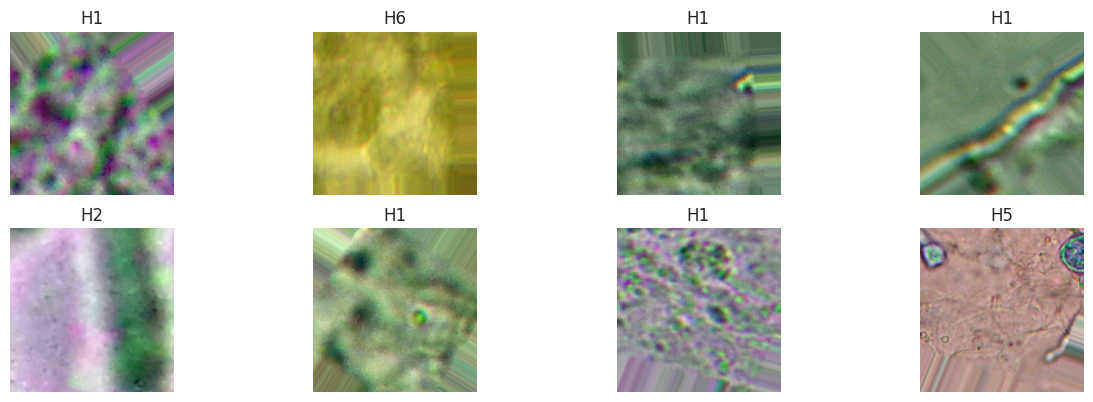

In [ ]:
plt.figure(figsize=(15, 20))
for images, labels in train.take(1):
    for i in range(8):
        ax = plt.subplot(8, 4, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

## Model Creation

In [ ]:
# Create VGG19 base model
base_model = tf.keras.applications.VGG19(input_shape=(224, 224, 3), include_top=False, weights='imagenet')
base_model.trainable = False

# Create a sequential model
keras_model = keras.models.Sequential()

# Add the VGG19 base model to the sequential model
keras_model.add(base_model)

# Flatten the output of the base model
keras_model.add(keras.layers.Flatten())

# Add dropout layer
keras_model.add(keras.layers.Dropout(0.5))

# Add dense layer with softmax activation for classification
keras_model.add(keras.layers.Dense(5, activation=tf.nn.softmax))

# Display model summary
keras_model.summary()

80134624/80134624 [==============================] - 1s 0us/step
Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg19 (Functional)          (None, 7, 7, 512)         20024384  
                                                                 
 flatten_4 (Flatten)         (None, 25088)             0         
                                                                 
 dropout (Dropout)           (None, 25088)             0         
                                                                 
 dense_8 (Dense)             (None, 5)                 125445    
                                                                 
Total params: 20149829 (76.87 MB)
Trainable params: 125445 (490.02 KB)
Non-trainable params: 20024384 (76.39 MB)
_________________________________________________________________


In [ ]:
checkpoint =ModelCheckpoint("my_keras_model.h5", save_best_only=True)

In [ ]:
early_stopping =EarlyStopping(patience=5, restore_best_weights=True)

In [ ]:
keras_model.compile(optimizer ='Adam',loss='sparse_categorical_crossentropy', metrics=['accuracy'])
hist=keras_model.fit_generator(train,epochs=20,validation_data=validation,callbacks=[checkpoint,early_stopping])

Epoch 1/20
351/351 [==============================] - 91s 233ms/step - loss: 12.1944 - accuracy: 0.5116 - val_loss: 5.6746 - val_accuracy: 0.7102
Epoch 2/20
351/351 [==============================] - 78s 221ms/step - loss: 9.1317 - accuracy: 0.6447 - val_loss: 4.7435 - val_accuracy: 0.7455
Epoch 3/20
351/351 [==============================] - 71s 202ms/step - loss: 8.4708 - accuracy: 0.6805 - val_loss: 5.8140 - val_accuracy: 0.7647
Epoch 4/20
351/351 [==============================] - 72s 203ms/step - loss: 8.2352 - accuracy: 0.7104 - val_loss: 4.8222 - val_accuracy: 0.8004
Epoch 5/20
351/351 [==============================] - 72s 202ms/step - loss: 7.9350 - accuracy: 0.7340 - val_loss: 4.3323 - val_accuracy: 0.8214
Epoch 6/20
351/351 [==============================] - 71s 202ms/step - loss: 7.4836 - accuracy: 0.7531 - val_loss: 4.4072 - val_accuracy: 0.8275
Epoch 7/20
351/351 [==============================] - 77s 219ms/step - loss: 7.0701 - accuracy: 0.7632 - val_loss: 4.5781 - val_a

In [ ]:
score, acc = keras_model.evaluate(validation)
print('Test Loss =', score)
print('Test Accuracy =', acc)

88/88 [==============================] - 16s 167ms/step - loss: 4.3323 - accuracy: 0.8214
Test Loss = 4.332274436950684
Test Accuracy = 0.8213903903961182


In [ ]:
hist_=pd.DataFrame(hist.history)
hist_

,loss,accuracy,val_loss,val_accuracy
0,12.194438,0.511586,5.674629,0.710160
1,9.131733,0.644742,4.743486,0.745455
2,8.470792,0.680481,5.814042,0.764706
3,8.235181,0.710428,4.822221,0.800357
4,7.934968,0.733957,4.332274,0.821390
5,7.483590,0.753119,4.407212,0.827451
6,7.070093,0.763191,4.578135,0.847415
7,7.371385,0.768004,4.919735,0.833868
8,6.931167,0.785205,4.919426,0.850624
9,6.900494,0.789840,4.632580,0.856685


## Evaluation Metrics

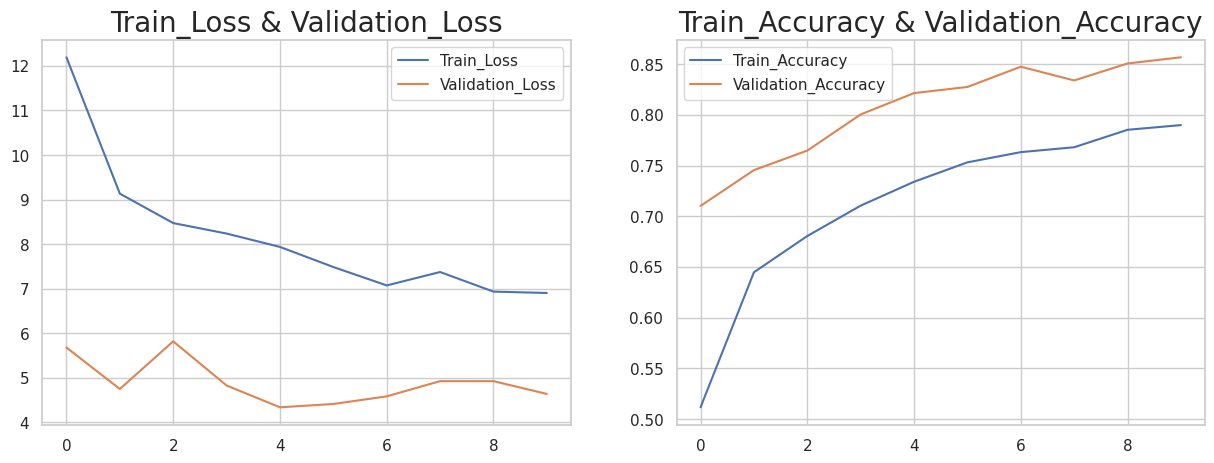

In [ ]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(hist_['loss'],label='Train_Loss')
plt.plot(hist_['val_loss'],label='Validation_Loss')
plt.title('Train_Loss & Validation_Loss',fontsize=20)
plt.legend()
plt.subplot(1,2,2)
plt.plot(hist_['accuracy'],label='Train_Accuracy')
plt.plot(hist_['val_accuracy'],label='Validation_Accuracy')
plt.title('Train_Accuracy & Validation_Accuracy',fontsize=20)
plt.legend()

In [ ]:
X_val,y_val,y_pred=[],[],[]
for images, labels in validation:
    y_val.extend(labels.numpy())
    X_val.extend(images.numpy())
predictions=keras_model.predict(np.array(X_val))
for i in predictions:
    y_pred.append(np.argmax(i))
df=pd.DataFrame()
df['Actual'],df['Prediction']=y_val,y_pred
df

88/88 [==============================] - 14s 162ms/step


,Actual,Prediction
0,0,0
1,0,0
2,1,0
3,1,1
4,0,0
...,...,...
2800,3,3
2801,2,2
2802,0,0
2803,0,0


In [ ]:
plt.figure(figsize=(25,25))
for i in range(32):
    ax = plt.subplot(8, 4, i + 1)
    plt.imshow(X_val[i].astype("uint8"))
    plt.title(f'{class_names[y_val[i]]} :: {class_names[y_pred[i]]}')
    plt.axis("off")

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
Acc = accuracy_score(y_val,y_pred)
print("accuracy is: {0:.3f}%".format(Acc * 100))

accuracy is: 82.139%


# Model III: VGG19 Model with UnEnhanced Images

## Data Partitioning

In [ ]:
train_data_dir = fungi_output
batch_size = 32
target_size = (224,224)
validation_split = 0.2
train= tf.keras.preprocessing.image_dataset_from_directory(
    train_data_dir,
    validation_split=validation_split,
    subset="training",
    seed=100,
    image_size=target_size,
    batch_size=batch_size,
)
validation= tf.keras.preprocessing.image_dataset_from_directory(
    train_data_dir,
    validation_split=validation_split,
    subset="validation",
    seed=200,
    image_size=target_size,
    batch_size=batch_size,
)

Found 9114 files belonging to 5 classes.
Using 7292 files for training.
Found 9114 files belonging to 5 classes.
Using 1822 files for validation.


In [ ]:
class_names = train.class_names
class_names

['H1', 'H2', 'H3', 'H5', 'H6']

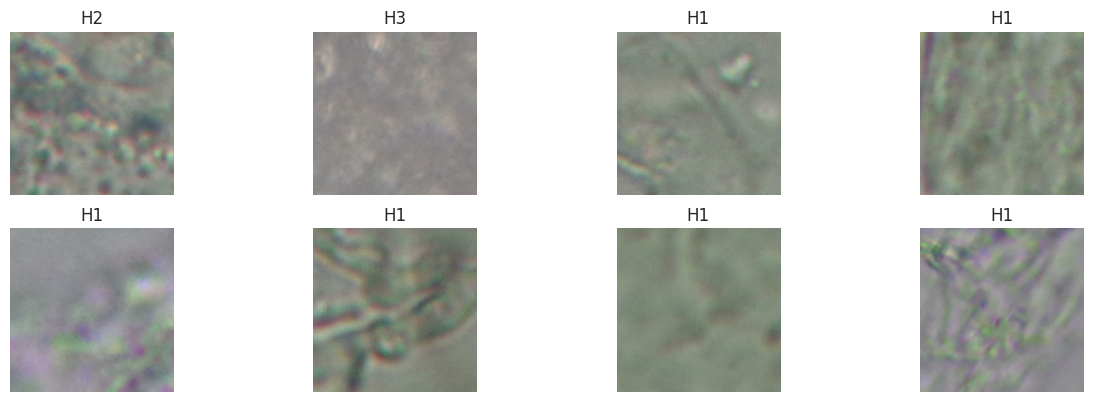

In [ ]:
plt.figure(figsize=(15, 20))
for images, labels in train.take(1):
    for i in range(8):
        ax = plt.subplot(8, 4, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

## Model Creation

In [ ]:
# Create VGG19 base model
base_model = tf.keras.applications.VGG19(input_shape=(224, 224, 3), include_top=False, weights='imagenet')
base_model.trainable = False

# Create a sequential model
keras_model = keras.models.Sequential()

# Add the VGG19 base model to the sequential model
keras_model.add(base_model)

# Flatten the output of the base model
keras_model.add(keras.layers.Flatten())

# Add dropout layer
keras_model.add(keras.layers.Dropout(0.5))

# Add dense layer with softmax activation for classification
keras_model.add(keras.layers.Dense(5, activation=tf.nn.softmax))

# Display model summary
keras_model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg19 (Functional)          (None, 7, 7, 512)         20024384  
                                                                 
 flatten_5 (Flatten)         (None, 25088)             0         
                                                                 
 dropout_1 (Dropout)         (None, 25088)             0         
                                                                 
 dense_9 (Dense)             (None, 5)                 125445    
                                                                 
Total params: 20149829 (76.87 MB)
Trainable params: 125445 (490.02 KB)
Non-trainable params: 20024384 (76.39 MB)
_________________________________________________________________


In [ ]:
checkpoint =ModelCheckpoint("my_keras_model.h5", save_best_only=True)

In [ ]:
early_stopping =EarlyStopping(patience=5, restore_best_weights=True)

In [ ]:
keras_model.compile(optimizer ='Adam',loss='sparse_categorical_crossentropy', metrics=['accuracy'])
hist=keras_model.fit_generator(train,epochs=20,validation_data=validation,callbacks=[checkpoint,early_stopping])

Epoch 1/20
228/228 [==============================] - 62s 264ms/step - loss: 4.4295 - accuracy: 0.5817 - val_loss: 1.6609 - val_accuracy: 0.7607
Epoch 2/20
228/228 [==============================] - 48s 209ms/step - loss: 2.8974 - accuracy: 0.7019 - val_loss: 1.4611 - val_accuracy: 0.8057
Epoch 3/20
228/228 [==============================] - 48s 207ms/step - loss: 2.5602 - accuracy: 0.7308 - val_loss: 1.1221 - val_accuracy: 0.8414
Epoch 4/20
228/228 [==============================] - 48s 207ms/step - loss: 2.2700 - accuracy: 0.7666 - val_loss: 1.0923 - val_accuracy: 0.8397
Epoch 5/20
228/228 [==============================] - 47s 206ms/step - loss: 1.9878 - accuracy: 0.7866 - val_loss: 1.3459 - val_accuracy: 0.8600
Epoch 6/20
228/228 [==============================] - 48s 204ms/step - loss: 1.9545 - accuracy: 0.7987 - val_loss: 1.3599 - val_accuracy: 0.8496
Epoch 7/20
228/228 [==============================] - 47s 203ms/step - loss: 1.8010 - accuracy: 0.8201 - val_loss: 1.0504 - val_ac

## Evaluation Metrics

In [ ]:
score, acc = keras_model.evaluate(validation)
print('Test Loss =', score)
print('Test Accuracy =', acc)

57/57 [==============================] - 9s 154ms/step - loss: 1.0504 - accuracy: 0.8798
Test Loss = 1.0503844022750854
Test Accuracy = 0.879802405834198


In [ ]:
hist_=pd.DataFrame(hist.history)
hist_

,loss,accuracy,val_loss,val_accuracy
0,4.429474,0.581733,1.660854,0.760703
1,2.897422,0.701865,1.461076,0.805708
2,2.560195,0.730801,1.122134,0.841383
3,2.270022,0.766594,1.092346,0.839737
4,1.987820,0.786615,1.345906,0.860044
5,1.954479,0.798683,1.359944,0.849616
6,1.801037,0.820077,1.050384,0.879802
7,1.789501,0.818843,1.165343,0.876509
8,1.793506,0.825562,1.616372,0.872667
9,1.799377,0.829128,1.270890,0.884742


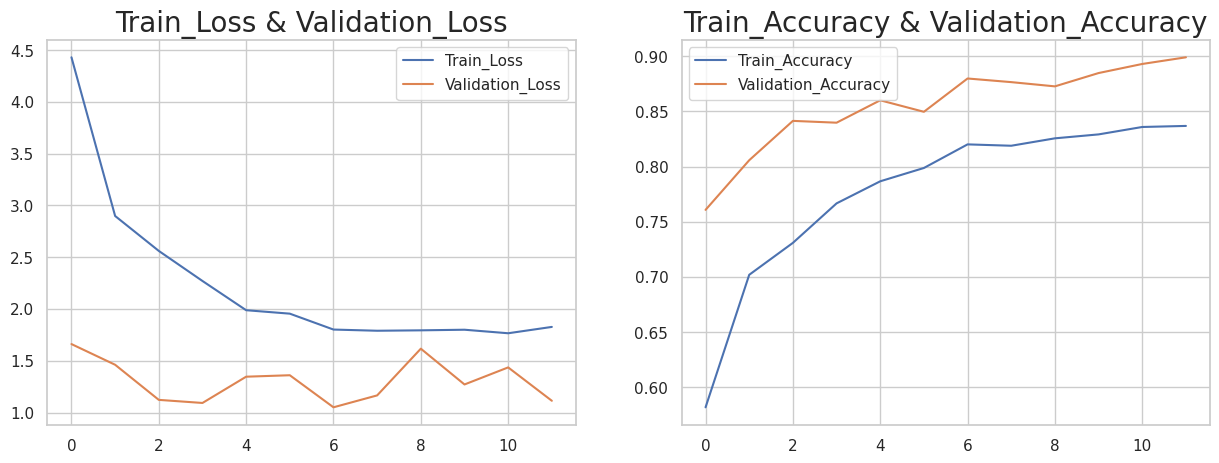

In [ ]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(hist_['loss'],label='Train_Loss')
plt.plot(hist_['val_loss'],label='Validation_Loss')
plt.title('Train_Loss & Validation_Loss',fontsize=20)
plt.legend()
plt.subplot(1,2,2)
plt.plot(hist_['accuracy'],label='Train_Accuracy')
plt.plot(hist_['val_accuracy'],label='Validation_Accuracy')
plt.title('Train_Accuracy & Validation_Accuracy',fontsize=20)
plt.legend()

In [ ]:
X_val,y_val,y_pred=[],[],[]
for images, labels in validation:
    y_val.extend(labels.numpy())
    X_val.extend(images.numpy())
predictions=keras_model.predict(np.array(X_val))
for i in predictions:
    y_pred.append(np.argmax(i))
df=pd.DataFrame()
df['Actual'],df['Prediction']=y_val,y_pred
df

57/57 [==============================] - 9s 158ms/step


,Actual,Prediction
0,4,4
1,0,0
2,0,1
3,0,0
4,0,1
...,...,...
1817,0,0
1818,0,1
1819,0,0
1820,1,1


In [ ]:
plt.figure(figsize=(25,25))
for i in range(32):
    ax = plt.subplot(8, 4, i + 1)
    plt.imshow(X_val[i].astype("uint8"))
    plt.title(f'{class_names[y_val[i]]} :: {class_names[y_pred[i]]}')
    plt.axis("off")

Output hidden; open in https://colab.research.google.com to view.

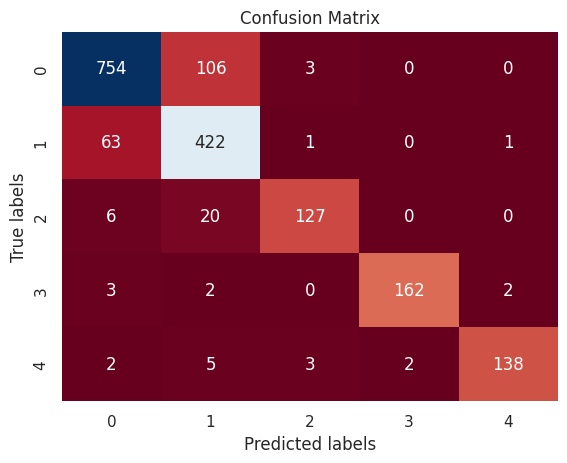

array([[754, 106,   3,   0,   0],
       [ 63, 422,   1,   0,   1],
       [  6,  20, 127,   0,   0],
       [  3,   2,   0, 162,   2],
       [  2,   5,   3,   2, 138]])

In [ ]:
ax= plt.subplot()
CM = confusion_matrix(y_val,y_pred)
sns.heatmap(CM, annot=True, fmt='g', ax=ax,cbar=False,cmap='RdBu')
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
plt.show()
CM

In [ ]:
Acc = accuracy_score(y_val,y_pred)
print("accuracy is: {0:.3f}%".format(Acc * 100))

accuracy is: 87.980%
